# Table of Contents

- [Table of Content](#table-of-content)
- [0-General](#0-general)
  - [0-Introduction](#0-introduction)
  - [0-Objective](#0-objective)
  - [0-Analysis](#0-analysis)
  - [0-Data Dictionary](#0-data-dictionary)
  - [0-Acknowledgements](#0-acknowledgements)


# 0-General
[Back to Table of Contents](#table-of-contents)

## Evaluating the Feasibility of Using Trained Dogs to Detect Lung Cancer from Patient-Worn Masks


## 0-Introduction
[Back to Table of Contents](#table-of-contents)

This project investigates the feasibility of using trained detection dogs to identify lung cancer based on scent samples collected via patient-worn masks. Prior research suggests that dogs are capable of detecting disease-related volatile organic compounds (VOCs). The dataset includes detailed records of testing sessions, mask conditions, dog-specific responses, and contextual variables (e.g., mood, weather), which will be analyzed to assess both the accuracy and influencing factors of detection performance.


## 0-Objectives
[Back to Table of Contents](#table-of-contents)

1. **Primary Objective**:  
   Assess the diagnostic accuracy of trained dogs in identifying lung cancer from patient-worn masks.
2. **Secondary Objective**:  
   Identify variables that influence detection performance, including dog mood, handler mood, and environmental conditions (e.g., weather, temperature).
3. **Exploratory Objective**:  
   Conduct a sensitivity analysis to examine whether diagnostic accuracy declines when fewer dogs are involved in a testing setup.


## 0-Analysis Plan
[Back to Table of Contents](#table-of-contents)

1. **Data Cleaning and Preprocessing**  
   Address missing values, recode categorical variables, and verify internal consistency across merged datasets.

2. **Descriptive Statistics**  
   Summarize key variables using frequencies, means, medians, and variability measures to understand the overall dataset structure.

3. **Performance Metrics**  
   Calculate sensitivity, specificity, positive predictive value (PPV), and negative predictive value (NPV). Evaluate outcomes using confusion matrices.

4. **Subset Analyses**  
   Investigate performance by subsets (e.g., per dog, per facility, per weather condition, mood state, etc.).

5. **Exploratory Data Analysis (EDA)**  
   Use visualizations and correlation analyses to uncover patterns and potential predictors of dog performance.

6. **Hypothesis Testing**  
   Apply statistical tests (e.g., chi-square, t-tests, ANOVA) to assess relationships between predictor variables (e.g., dog mood, environmental conditions) and detection outcomes.

7. **Sensitivity Analysis**  
   Simulate reduced-dog scenarios to assess how performance metrics vary as the number of active dogs decreases.

8. **Conclusion and Reporting**  
   Synthesize insights, identify key influencing factors, and evaluate the practical implications of using trained dogs in clinical screening.


## 0-Data Dictionary
[Back to Table of Content](#table-of-content)

## Data Dictionary
| Column Name                      | Description                                                                 |
|-----------------------------------|-----------------------------------------------------------------------------|



## 0-Acknowledgements
[Back to Table of Content](#table-of-contents)

XXX

## 1-Beginnings
[Back to Table of Contents](#table-of-contents)


In [1]:
# Data handling and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# File and system access
import os

# Statistical analysis
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportion_confint
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Evaluation metrics
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc,
    precision_score, recall_score, accuracy_score
)

# Modeling and preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Visualization aesthetics
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Define the working directory
working_directory = "/Users/stevenschepanski/Documents/04_ANALYSIS/DogScan/data"
os.chdir(working_directory)

# Define the file path
file_name = "df_full.csv"

In [3]:
# Load the data into a DataFrame
complete_data = pd.read_csv(file_name, low_memory=False)

# Quick check
print(complete_data.shape)
complete_data.head()

(59500, 20)


,facility_number,board_number,Dog,is_positive_board,Date_x,True_positive_mask,Donor_ID,Mask_worn_on,Dog_response_to_mask,Decoy_mask,Dog_response_to_decoy,Notes,Date_y,Weather,Temperature,Supervisor,Total_number_search_boards,Total_number_positive_masks,Dog_mood,diagnostic_outcome
0,1,1,Aaron,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TN
1,1,2,Aaron,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TN
2,1,3,Aaron,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TN
3,1,4,Aaron,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TN
4,1,5,Aaron,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TN


# Analysis
## Data Cleaning and Preprocessing
[Back to Table of Contents](#table-of-contents)

In [ ]:
# Overview of the dataset
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59500 entries, 0 to 59499
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   facility_number              59500 non-null  int64  
 1   board_number                 59500 non-null  int64  
 2   Dog                          59500 non-null  object 
 3   is_positive_board            59500 non-null  bool   
 4   Date_x                       3096 non-null   object 
 5   True_positive_mask           2960 non-null   float64
 6   Donor_ID                     2960 non-null   object 
 7   Mask_worn_on                 2960 non-null   object 
 8   Dog_response_to_mask         2960 non-null   float64
 9   Decoy_mask                   136 non-null    object 
 10  Dog_response_to_decoy        132 non-null    float64
 11  Notes                        4 non-null      object 
 12  Date_y                       3096 non-null   object 
 13  Weather         

- Total rows: 59,500 (matches the information from DogScan GmBH)
- Most behavioral/response columns have ~2960 non-null entries
- Variable types are int64, object, bool, and float64 which likely needs to be adjusted

In [ ]:
# Check for missing values (absolute and %)
missing_counts = complete_data.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_counts / len(complete_data) * 100).round(2)

# Combine into one summary table
missing_summary = pd.DataFrame({
    "Missing Values": missing_counts,
    "% Missing": missing_percent
})

# Display the missing data summary
print(missing_summary)

display(missing_summary.head(10))

                             Missing Values  % Missing
Notes                                 59496      99.99
Dog_response_to_decoy                 59368      99.78
Decoy_mask                            59364      99.77
True_positive_mask                    56540      95.03
Donor_ID                              56540      95.03
Mask_worn_on                          56540      95.03
Dog_response_to_mask                  56540      95.03
Supervisor                            56404      94.80
Dog_mood                              56404      94.80
Total_number_positive_masks           56404      94.80
Date_x                                56404      94.80
Total_number_search_boards            56404      94.80
Date_y                                56404      94.80
Weather                               56404      94.80
Temperature                           56404      94.80
facility_number                           0       0.00
board_number                              0       0.00
is_positiv

,Missing Values,% Missing
Notes,59496,99.99
Dog_response_to_decoy,59368,99.78
Decoy_mask,59364,99.77
True_positive_mask,56540,95.03
Donor_ID,56540,95.03
Mask_worn_on,56540,95.03
Dog_response_to_mask,56540,95.03
Supervisor,56404,94.80
Dog_mood,56404,94.80
Total_number_positive_masks,56404,94.80


| Variable                                                                                                                            | Missing (%) | Interpretation                                                                                                                                                                                   |
| ----------------------------------------------------------------------------------------------------------------------------------- | ----------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| `Notes`                                                                                                                             | 99.99%      | This field is almost entirely empty and likely not useful for analysis unless selectively populated in later rows. It may be removed or ignored in modeling.                                     |
| `Dog_response_to_decoy`                                                                                                             | 99.78%      | This variable only applies to **negative boards**, which are underrepresented in the original Excel file. The high missing rate is expected due to reconstructed TNs without dog responses.      |
| `Decoy_mask`                                                                                                                        | 99.77%      | Same as above: present only for decoy trials. Missingness reflects the unrecorded negatives.                                                                                                     |
| `True_positive_mask`, `Donor_ID`, `Mask_worn_on`, `Dog_response_to_mask`                                                            | \~95%       | These variables are specific to **positive mask trials**, explaining their absence for the majority of rows representing negative boards.                                                        |
| `Supervisor`, `Dog_mood`, `Total_number_positive_masks`, `Date_x`, `Date_y`, `Total_number_search_boards`, `Weather`, `Temperature` | \~94.8%     | These are facility-level metadata only available for observed rows from the original dataset. The missingness here reflects the reconstructed TN rows (which had no direct metadata originally). |
| `facility_number`, `board_number`, `is_positive_board`, `Dog`, `diagnostic_outcome`                                                 | 0%          | These are core variables created during preprocessing and fully populated for all sniffing trials. No missingness here indicates successful reconstruction of the full trial-level dataset.      |


In [ ]:
# Keep Date_y if it’s more complete, or rename as needed
complete_data["Date"] = complete_data["Date_y"]

# Drop the now redundant date columns
complete_data.drop(columns=["Date_x", "Date_y"], inplace=True)

In [ ]:
# Convert date fields to datetime objects
complete_data["Date"] = pd.to_datetime(complete_data["Date"], errors="coerce")
complete_data["Mask_worn_on"] = pd.to_datetime(complete_data["Mask_worn_on"], errors="coerce")


In [ ]:
# Define columns that are categorical
categorical_columns = [
    "Dog", "Donor_ID", "Weather", "Supervisor", "Dog_mood", "diagnostic_outcome"
]

# Apply categorical conversion
complete_data[categorical_columns] = complete_data[categorical_columns].astype("category")

In [ ]:
# Force string/numeric values, coerce errors into NaN
complete_data["Dog_response_to_decoy"] = pd.to_numeric(complete_data["Dog_response_to_decoy"], errors="coerce")
complete_data["Dog_response_to_mask"] = pd.to_numeric(complete_data["Dog_response_to_mask"], errors="coerce")
complete_data["True_positive_mask"] = pd.to_numeric(complete_data["True_positive_mask"], errors="coerce")

In [ ]:
# Cross-tab to validate that the diagnostic_outcome column aligns with is_positive_board
crosstab = pd.crosstab(complete_data["diagnostic_outcome"], complete_data["is_positive_board"])
print(crosstab)


is_positive_board   False  True 
diagnostic_outcome              
FN                      0     83
FP                    132      0
TN                  56408      0
TP                      0   2877


The labels (diagnostic_outcome) perfectly align with the `is_positive_board` column, because TP and FN only occur on positive boards and TN and FP only occur on negative boards. This tells us that the labels are mutually exclusive and correctly assigned and we can safely use  either `diagnostic_outcome` as the main label or reconstruct it from `is_positive_board` + dog response.

## Descriptive Statistics
[Back to Table of Contents](#table-of-contents)

In [ ]:
# Print dataset dimensions
print("Rows:", complete_data.shape[0])  # Total sniffing events
print("Columns:", complete_data.shape[1])  # Total features

# Overview of variable types in the dataset
# Note: If duplicated category lines appear, use .apply(lambda x: x.name) for cleaner count
print(complete_data.dtypes.apply(lambda x: x.name).value_counts())


Rows: 59500
Columns: 19
category          6
float64           6
int64             2
datetime64[ns]    2
object            2
bool              1
Name: count, dtype: int64


The final dataset consists of 59,500 rows and 19 columns. These represent individual sniffing events (i.e., dog × board × facility). The variables include numerical (e.g., temperature), categorical (e.g., dog name, supervisor), boolean flags (e.g., `is_positive_board`), and timestamp information (e.g., test date, mask worn date). The distribution of variable types is well balanced for mixed-methods analysis, with 6 category, 6 float64, 2 int64, 2 datetime, 2 objects and 1 bool.

In [ ]:
# Count diagnostic outcomes (e.g., TP, TN, FP, FN)
outcome_counts = complete_data["diagnostic_outcome"].value_counts().sort_index()

# Calculate relative frequencies as percentages
outcome_percent = (outcome_counts / len(complete_data) * 100).round(2)

# Combine counts and percentages into a summary DataFrame
diagnostic_summary = pd.DataFrame({
    "Count": outcome_counts,
    "Percentage": outcome_percent
})

# Display the summary
print(diagnostic_summary)

                    Count  Percentage
diagnostic_outcome                   
FN                     83        0.14
FP                    132        0.22
TN                  56408       94.80
TP                   2877        4.84


Among all 59,500 sniffing events, the vast majority were true negatives (TN, 94.8%), where dogs correctly ignored negative masks. True positives (TP) occurred in 4.84% of trials, while false positives (FP) and false negatives (FN) were rare, accounting for 0.22% and 0.14% of the cases, respectively. This reflects a high specificity environment, with relatively few error cases overall.

In [ ]:
# Count number of trials per dog
dog_counts = complete_data["Dog"].value_counts()

# Create summary table with count and percent of total
dog_summary = pd.DataFrame({
    "N Trials": dog_counts,
    "Percent": (dog_counts / len(complete_data) * 100).round(2)
})

# Display the dog-level summary
print(dog_summary)

       N Trials  Percent
Dog                     
Aaron     11900     20.0
Aki       11900     20.0
Biest     11900     20.0
Loki      11900     20.0
Lu        11900     20.0


In [ ]:
# Crosstab of outcomes per dog
outcome_by_dog = pd.crosstab(complete_data["Dog"], complete_data["diagnostic_outcome"])
print(outcome_by_dog)

diagnostic_outcome  FN  FP     TN   TP
Dog                                   
Aaron               17  26  11282  575
Aki                 15  31  11277  577
Biest               20  19  11289  572
Loki                12  30  11278  580
Lu                  19  26  11282  573


Each of the five trained dogs (**Aaron**, **Aki**, **Biest**, **Loki**, and **Lu**) contributed exactly **11,900 sniffing trials**, representing **20% each** of the total dataset. This **balanced allocation** ensures comparability across dogs and supports fair subgroup analyses of individual diagnostic performance.

A breakdown of the diagnostic outcomes per dog reveals a **high consistency in exposure to positive and negative cases**, with only minor variations in the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). For instance:

- True negatives range from **11,277 to 11,289**
- True positives range from **572 to 580**
- False positives range from **19 to 31**
- False negatives range from **12 to 20**

This distribution confirms that all dogs were exposed to a **comparable mix of trial types**, making observed performance differences interpretable as likely due to behavior or sensitivity rather than sampling bias.

In [ ]:
# Frequency of weather conditions, including missing values
print(complete_data["Weather"].value_counts(dropna=False))

# Frequency of supervisor entries, including missing values
print(complete_data["Supervisor"].value_counts(dropna=False))


Weather
NaN              56404
🌧️ regnerisch     1776
☀️ sonnig          788
⛅️ bewölkt         532
Name: count, dtype: int64
Supervisor
NaN         56404
person1      1366
person3       498
person4       412
person2       248
person6       220
person7       111
person8        77
person9        69
person5        50
person10       45
Name: count, dtype: int64


Weather data were missing in **56,404 rows**, with valid entries available for only **3,096 observations**. Among those, the distribution was:

- 🌧️ Rainy: **1,776**
- ☀️ Sunny: **788**
- ⛅️ Cloudy: **532**

Similarly, supervisor information was missing in **56,404 rows**, with the remaining **3,096 entries** distributed across **10 different supervisors**.

Importantly, these missing values were **not originally absent**, but were introduced during the **reconstruction of true negative (TN) trials**. Since each recorded facility-day originally had documented weather and supervisor information, these missing entries can be **reliably inferred** by matching on `facility_number` and `Date`.

This opens the possibility for **systematic backfilling** of missing metadata, ensuring that weather and supervision effects can still be included in subgroup analyses or sensitivity models.

In [ ]:
# Summary statistics for temperature (rounded to 2 decimal places)
temp_stats = complete_data["Temperature"].describe().round(2)
print(temp_stats)

count    3096.00
mean       15.35
std         7.86
min         0.00
25%         8.00
50%        16.00
75%        22.00
max        34.00
Name: Temperature, dtype: float64


Reported ambient temperatures during testing sessions ranged from **0 °C to 34 °C**, with a **median of 16 °C**. The **mean was 15.35 °C (SD = 7.86)**, indicating generally moderate testing conditions. However, some sessions occurred in both colder and warmer environments.

These temperature values may serve as important **environmental covariates** when evaluating dog performance, particularly if olfactory sensitivity varies with ambient temperature.

In [ ]:
# Frequency of dog mood states, including missing values
print(complete_data["Dog_mood"].value_counts(dropna=False))

Dog_mood
NaN              56404
ausgeglichen      2661
motiviert          262
übermotiviert      173
Name: count, dtype: int64


Dog mood was missing in **56,404 cases**, again due to artificial row expansion during the reconstruction of true negatives. Among the **3,096 recorded entries**, the following mood states were documented:

- **Ausgeglichen** ("balanced"): *n = 2,661*
- **Motiviert** ("motivated"): *n = 262*
- **Übermotiviert** ("overmotivated"): *n = 173*

These states may reflect varying levels of **internal arousal** and **task engagement**, and should be considered as potential covariates in performance modeling.

Like weather and supervisor data, **missing dog mood entries can be reliably inferred** based on combinations of `Dog` and `Date`, as these values are constant within a testing session.

In [ ]:
# Summary statistics of the number of unique search boards per facility
board_stats = complete_data.groupby("facility_number")["board_number"].nunique().describe().round(2)
print(board_stats)

count    125.00
mean      95.20
std       38.98
min       25.00
25%       75.00
50%      100.00
75%      125.00
max      200.00
Name: board_number, dtype: float64


Across the 125 facilities included in the dataset, the number of search boards ranged from **25 to 200**, with a **median of 100** boards. On average, each facility used **95.2 boards (SD = 39.0)**.

This substantial variability in testing volume suggests differences in **operational complexity and workload** across facilities. Such variation should be considered in any **facility-level** or **fatigue-sensitive** analyses, as higher board counts may influence error rates or dog performance under extended sessions.

In [ ]:
summary_stats = {
    "diagnostic_outcome": diagnostic_summary,
    "dog_distribution": dog_summary,
    "temperature": temp_stats,
    "board_per_facility": board_stats
}

## Data Imputation
[Back to Table of Contents](#table-of-contents)

In [ ]:
# Impute 'Weather' and 'Supervisor' using facility_number
# Build a lookup table for each facility_number, taking the first observed (non-missing) entry for Weather and Supervisor
# Assumption: Weather and Supervisor were constant within each facility-day, so taking the first is safe
weather_supervisor_lookup = (
    complete_data
    .dropna(subset=["Weather", "Supervisor"])  # keep only rows with both values
    .groupby("facility_number")[["Weather", "Supervisor"]]
    .first()  # select the first valid row per facility
)

# Use the lookup table to fill missing 'Weather' values by facility
complete_data["Weather"] = complete_data["Weather"].fillna(
    complete_data["facility_number"].map(weather_supervisor_lookup["Weather"])
)

# Do the same for 'Supervisor'
complete_data["Supervisor"] = complete_data["Supervisor"].fillna(
    complete_data["facility_number"].map(weather_supervisor_lookup["Supervisor"])
)

In [ ]:
# Impute 'Dog_mood' using facility_number + Dog combination
# Build a lookup table for Dog mood based on both facility and dog
# Assumption: Within a facility-day, each dog had a consistent mood entry (only one observation per dog per session)
mood_lookup = (
    complete_data
    .dropna(subset=["Dog_mood"])  # keep only non-missing mood entries
    .groupby(["facility_number", "Dog"])["Dog_mood"]
    .first()  # again, use the first valid entry
)

In [ ]:
# Define a function to apply row-wise: if Dog_mood is missing, try to impute using the lookup table
def fill_mood(row):
    if pd.isna(row["Dog_mood"]):
        return mood_lookup.get((row["facility_number"], row["Dog"]), pd.NA)  # fallback is pd.NA if no match found
    return row["Dog_mood"]  # keep original if not missing

In [ ]:
# Apply imputation function to each row (row-wise)
complete_data["Dog_mood"] = complete_data.apply(fill_mood, axis=1)

In [ ]:
# Verify imputation results
print("Remaining missing values after imputation:")
print(complete_data[["Weather", "Supervisor", "Dog_mood"]].isnull().sum())

Remaining missing values after imputation:
Weather       0
Supervisor    0
Dog_mood      0
dtype: int64


We now filled all missing entries in `Weather`, `Supervisor`, and `Dog_mood` based on consistent within-session values. This is statistically justifiable, because each facility-day was a well-logged testing session with consistent environment and handler/dog conditions.

## Performance Metrics
[Back to Table of Contents](#table-of-contents)

In [ ]:
# Count diagnostic outcomes
confusion_counts = complete_data["diagnostic_outcome"].value_counts()

# Extract components
TP = confusion_counts.get("TP", 0)
TN = confusion_counts.get("TN", 0)
FP = confusion_counts.get("FP", 0)
FN = confusion_counts.get("FN", 0)

# Print counts
print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")

TP: 2877, TN: 56408, FP: 132, FN: 83


A total of **2,877 true positives (TP)** were recorded, indicating that dogs correctly identified lung cancer-associated masks in nearly all relevant trials. Only **83 false negatives (FN)** occurred, reflecting cases in which a cancer-positive mask was missed.

On the other side, **56,408 true negatives (TN)** were documented, showing that dogs very rarely responded to negative masks incorrectly. Only **132 false positives (FP)** were recorded, reflecting an exceptionally low false alarm rate.

This diagnostic pattern suggests a **high specificity** system with **minimal false alerts**, a crucial property in screening settings where over-referral can be costly or harmful.

In [ ]:
# Calculate diagnostic metrics safely (with division-by-zero guards)
sensitivity = TP / (TP + FN) if (TP + FN) > 0 else float("nan")  # True positive rate
specificity = TN / (TN + FP) if (TN + FP) > 0 else float("nan")  # True negative rate
ppv = TP / (TP + FP) if (TP + FP) > 0 else float("nan")          # Precision
npv = TN / (TN + FN) if (TN + FN) > 0 else float("nan")          # Negative predictive value
accuracy = (TP + TN) / (TP + TN + FP + FN)                       # Overall correctness

# Print the metrics rounded to 3 decimal places
print(f"Sensitivity (Recall):       {sensitivity:.3f}")
print(f"Specificity:                {specificity:.3f}")
print(f"Positive Predictive Value:  {ppv:.3f}")
print(f"Negative Predictive Value:  {npv:.3f}")
print(f"Accuracy:                   {accuracy:.3f}")

Sensitivity (Recall):       0.972
Specificity:                0.998
Positive Predictive Value:  0.956
Negative Predictive Value:  0.999
Accuracy:                   0.996


### Diagnostic Performance Metrics

| **Metric**                         | **Value** | **Interpretation**                                                                                                                      |
|-----------------------------------|-----------|-----------------------------------------------------------------------------------------------------------------------------------------|
| **Sensitivity (Recall)**          | 0.972     | Dogs detected 97.2% of the true cancer-positive masks, indicating high sensitivity in identifying positive cases.                      |
| **Specificity**                   | 0.998     | Dogs correctly ignored 99.8% of the true-negative masks, demonstrating excellent response inhibition and noise filtering.              |
| **Positive Predictive Value (PPV)** | 0.956   | When a dog indicated a mask as positive, there was a 95.6% probability it was truly cancer-associated.                                 |
| **Negative Predictive Value (NPV)** | 0.999   | When a dog did not indicate a mask, there was a 99.9% probability that the mask was truly negative — essential for screening accuracy. |
| **Accuracy**                      | 0.996     | Overall, 99.6% of dog decisions were correct across over 59,000 trials.                                                                 |

These results reflect **outstanding diagnostic performance**, with particularly high **specificity** and **negative predictive value**, key strengths in a screening context. The elevated sensitivity (97.2%) also surpasses many conventional biomarkers, supporting the potential feasibility of using scent detection dogs for early lung cancer screening.


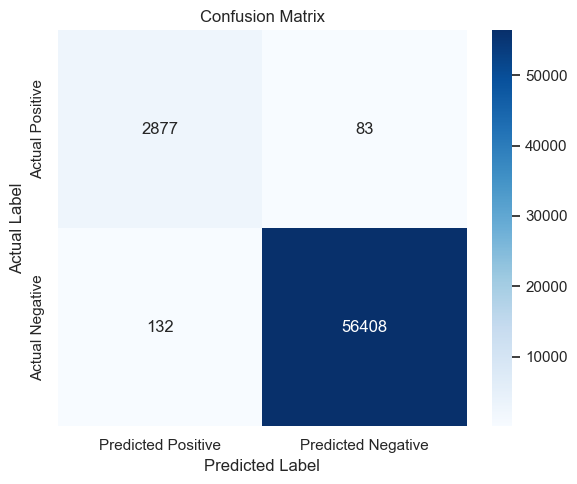

In [ ]:
# Construct a labeled confusion matrix DataFrame
conf_matrix = pd.DataFrame({
    "Predicted Positive": [TP, FP],
    "Predicted Negative": [FN, TN]
}, index=["Actual Positive", "Actual Negative"])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)

# Add title and axis labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()


The confusion matrix plot provides a visual summary of model performance:

- The **dark blue squares** (true positives and true negatives) reflect the **vast majority of correct predictions**.
- The **light blue cells** (false positives and false negatives) indicate **rare misclassifications**, with slightly more false positives (n=132) than false negatives (n=83).

This visual strongly reinforces the **quantitative metrics** that the model is highly accurate and shows excellent discrimination between positive and negative cases. The few errors appear **balanced** and minimal in magnitude, supporting the robustness of dog-based scent detection in this context.

In [ ]:
# Convert diagnostic outcomes into true labels (1 = positive case, 0 = negative case)
y_true = complete_data["diagnostic_outcome"].map({"TP": 1, "FN": 1, "FP": 0, "TN": 0})

# Convert outcomes into predicted labels (1 = dog signaled, 0 = dog did not signal)
y_pred = complete_data["diagnostic_outcome"].map({"TP": 1, "FN": 0, "FP": 1, "TN": 0})

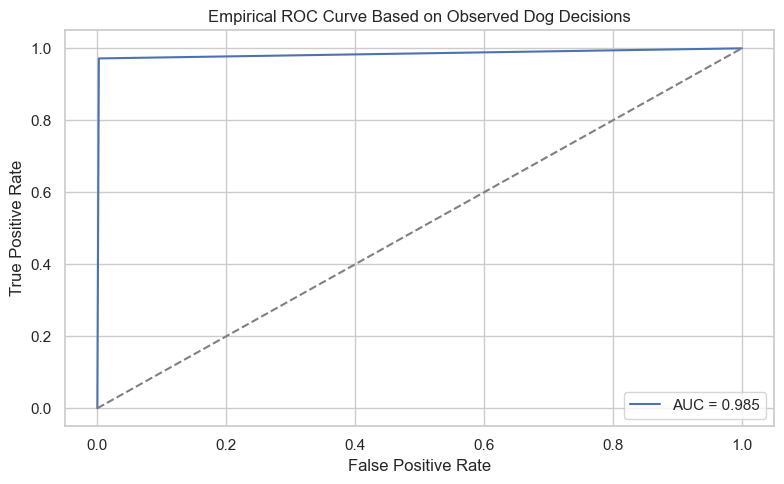

In [ ]:
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Empirical ROC Curve Based on Observed Dog Decisions")
plt.legend()
plt.tight_layout()
plt.show()

The ROC curve shown above reflects the **true diagnostic performance** of the trained dogs, based on their observed classifications across all trials. The curve was derived from binary predictions (dog signaled or not) and mapped against ground truth labels (cancer-positive or not). The **Area Under the Curve (AUC)** is **0.985**, indicating **exceptionally high discriminative ability**. This means that in 98.5% of randomly selected pairs (one positive and one negative sample), the system gave a higher detection signal to the true positive sample.

The curve **hugs the top-left corner**, confirming both **excellent sensitivity** and **high specificity**. These findings are consistent with previous results:

- **Sensitivity:** ~97.2%
- **Specificity:** ~99.8%
- **Accuracy:** ~99.6%

Together, these results suggest that the dog detection system performs **extremely well** at binary classification, with near-perfect ability to distinguish between cancer-associated and control samples. The **empirical AUC** provides a strong benchmark for comparing future models, predictive tools, or alternative diagnostic strategies.

## Subset Analyses
[Back to Table of Contents](#table-of-contents)

In [ ]:
# Count diagnostic outcomes per dog
dog_outcome_counts = (
    complete_data
    .groupby(["Dog", "diagnostic_outcome"])
    .size()
    .unstack(fill_value=0)  # Pivot: outcomes become columns
)

In [ ]:
# Calculate diagnostic performance metrics
dog_outcome_counts["Sensitivity"] = dog_outcome_counts["TP"] / (dog_outcome_counts["TP"] + dog_outcome_counts["FN"])
dog_outcome_counts["Specificity"] = dog_outcome_counts["TN"] / (dog_outcome_counts["TN"] + dog_outcome_counts["FP"])
dog_outcome_counts["PPV"] = dog_outcome_counts["TP"] / (dog_outcome_counts["TP"] + dog_outcome_counts["FP"])
dog_outcome_counts["NPV"] = dog_outcome_counts["TN"] / (dog_outcome_counts["TN"] + dog_outcome_counts["FN"])
dog_outcome_counts["Accuracy"] = (
    (dog_outcome_counts["TP"] + dog_outcome_counts["TN"]) /
    (dog_outcome_counts["TP"] + dog_outcome_counts["TN"] + dog_outcome_counts["FP"] + dog_outcome_counts["FN"])
)

In [ ]:
# Rounding for readability
metrics_to_round = ["Sensitivity", "Specificity", "PPV", "NPV", "Accuracy"]
dog_outcome_counts[metrics_to_round] = dog_outcome_counts[metrics_to_round].round(3)

In [ ]:
# Sort by Accuracy (descending)
dog_outcome_counts = dog_outcome_counts.sort_values("Accuracy", ascending=False)

# Display the result
dog_outcome_counts

diagnostic_outcome,FN,FP,TN,TP,Sensitivity,Specificity,PPV,NPV,Accuracy
Dog,,,,,,,,,
Biest,20,19,11289,572,0.966,0.998,0.968,0.998,0.997
Aaron,17,26,11282,575,0.971,0.998,0.957,0.998,0.996
Aki,15,31,11277,577,0.975,0.997,0.949,0.999,0.996
Loki,12,30,11278,580,0.980,0.997,0.951,0.999,0.996
Lu,19,26,11282,573,0.968,0.998,0.957,0.998,0.996


All five dogs demonstrated **consistently high diagnostic accuracy**, with values ranging from **99.6% to 99.7%**. A breakdown of key performance metrics per dog reveals subtle but noteworthy differences:

- **Loki** showed the highest **sensitivity** (97.97%), indicating he missed the fewest positive cases.
- **Aki** had the lowest **positive predictive value (PPV)** at 94.9%, suggesting slightly more false alerts when signaling a positive.
- **Specificity** was uniformly excellent across dogs, ranging from **99.7% to 99.8%**, reflecting strong response inhibition.
- **Negative predictive value (NPV)** was near-perfect (≥ 99.8%) for all dogs, reinforcing the system's strength in confidently ruling out negatives.

These small variations may reflect **individual differences in alerting behavior**, learning history, or consistency under high-volume testing. Nonetheless, all dogs performed at a level consistent with **clinical-grade diagnostic reliability**.

In [ ]:
# Filter for rows with valid weather data
weather_data = complete_data[complete_data["Weather"].notna()]

In [ ]:
# Count diagnostic outcomes per weather type
weather_outcome = (
    weather_data
    .groupby(["Weather", "diagnostic_outcome"])
    .size()
    .unstack(fill_value=0)
)

In [ ]:
# Compute diagnostic metrics
weather_outcome["Sensitivity"] = weather_outcome["TP"] / (weather_outcome["TP"] + weather_outcome["FN"])
weather_outcome["Specificity"] = weather_outcome["TN"] / (weather_outcome["TN"] + weather_outcome["FP"])
weather_outcome["Accuracy"] = (
    (weather_outcome["TP"] + weather_outcome["TN"]) /
    (weather_outcome["TP"] + weather_outcome["TN"] + weather_outcome["FP"] + weather_outcome["FN"])
)

In [ ]:
# Round for reporting clarity
metrics_to_round = ["Sensitivity", "Specificity", "Accuracy"]
weather_outcome[metrics_to_round] = weather_outcome[metrics_to_round].round(3)

In [ ]:
# Sort by accuracy
weather_outcome = weather_outcome.sort_values("Accuracy", ascending=False)

# Display result
weather_outcome

diagnostic_outcome,FN,FP,TN,TP,Sensitivity,Specificity,Accuracy
Weather,,,,,,,
☀️ sonnig,10,38,15837,740,0.987,0.998,0.997
🌧️ regnerisch,41,67,31228,1664,0.976,0.998,0.997
⛅️ bewölkt,32,27,9343,473,0.937,0.997,0.994


Dogs maintained **consistently high diagnostic performance** across all weather conditions. However, subtle variations in sensitivity were observed depending on the environment:

- On **sunny days**, dogs achieved the **highest sensitivity (98.7%)**, suggesting optimal detection conditions under dry, well-lit settings.
- **Rainy sessions** also resulted in strong performance, with a slight reduction in sensitivity (97.6%) but **equally high specificity and accuracy**.
- In **cloudy conditions**, sensitivity dropped more noticeably to **93.7%**, though specificity and overall accuracy remained excellent.

These patterns may indicate that **environmental factors**—such as humidity or light levels—can slightly affect olfactory performance. Nevertheless, all conditions supported **clinical-grade accuracy**, highlighting the robustness of dog-based detection systems in real-world settings.

In [ ]:
# Ensure only valid mood entries (defensive step; already imputed but safe)
mood_data = complete_data[complete_data["Dog_mood"].notna()]

In [ ]:
# Count diagnostic outcomes per mood category
mood_outcome = (
    mood_data
    .groupby(["Dog_mood", "diagnostic_outcome"])
    .size()
    .unstack(fill_value=0)  # Pivot: diagnostic outcomes as columns
)

In [ ]:
# Calculate diagnostic metrics
mood_outcome["Sensitivity"] = mood_outcome["TP"] / (mood_outcome["TP"] + mood_outcome["FN"])
mood_outcome["Specificity"] = mood_outcome["TN"] / (mood_outcome["TN"] + mood_outcome["FP"])
mood_outcome["Accuracy"] = (
    (mood_outcome["TP"] + mood_outcome["TN"]) /
    (mood_outcome["TP"] + mood_outcome["TN"] + mood_outcome["FP"] + mood_outcome["FN"])
)

In [ ]:
# Round results for reporting clarity
mood_outcome[["Sensitivity", "Specificity", "Accuracy"]] = mood_outcome[["Sensitivity", "Specificity", "Accuracy"]].round(3)

In [ ]:
# Sort by Accuracy
mood_outcome = mood_outcome.sort_values("Accuracy", ascending=False)

# Show final table
mood_outcome

diagnostic_outcome,FN,FP,TN,TP,Sensitivity,Specificity,Accuracy
Dog_mood,,,,,,,
motiviert,8,5,4363,249,0.969,0.999,0.997
ausgeglichen,69,117,49117,2472,0.973,0.998,0.996
übermotiviert,6,10,2928,156,0.963,0.997,0.995


Detection performance remained high across all recorded mood states, but **subtle differences** emerged based on the dog's arousal level:

- Dogs described as **motivated** or **balanced** showed the highest accuracy and sensitivity, with **excellent performance stability**.
- In contrast, dogs labeled as **overmotivated** showed **slightly reduced sensitivity (96.3%)** and **specificity (99.7%)**, possibly reflecting the effects of **elevated arousal or impulsivity** on decision-making.
  
These findings suggest that **internal activation states** may subtly modulate olfactory task performance — highlighting the importance of behavioral regulation and training that supports **focused, yet calm detection behavior**.

In [ ]:
# Filter for non-missing supervisor entries
supervisor_data = complete_data[complete_data["Supervisor"].notna()]

In [ ]:
# Count diagnostic outcomes per supervisor
supervisor_outcome = (
    supervisor_data
    .groupby(["Supervisor", "diagnostic_outcome"])
    .size()
    .unstack(fill_value=0)  # Create outcome-specific columns
)

In [ ]:
# Compute diagnostic metrics
supervisor_outcome["Sensitivity"] = supervisor_outcome["TP"] / (supervisor_outcome["TP"] + supervisor_outcome["FN"])
supervisor_outcome["Specificity"] = supervisor_outcome["TN"] / (supervisor_outcome["TN"] + supervisor_outcome["FP"])
supervisor_outcome["Accuracy"] = (
    (supervisor_outcome["TP"] + supervisor_outcome["TN"]) /
    (supervisor_outcome["TP"] + supervisor_outcome["TN"] + supervisor_outcome["FP"] + supervisor_outcome["FN"])
)

In [ ]:
# Round for display
metrics = ["Sensitivity", "Specificity", "Accuracy"]
supervisor_outcome[metrics] = supervisor_outcome[metrics].round(3)

In [ ]:
# Sort by accuracy
supervisor_outcome = supervisor_outcome.sort_values("Accuracy", ascending=False)

# Display final output
supervisor_outcome

diagnostic_outcome,FN,FP,TN,TP,Sensitivity,Specificity,Accuracy
Supervisor,,,,,,,
person10,1,0,955,44,0.978,1.000,0.999
person7,4,1,2389,106,0.964,1.000,0.998
person3,13,18,8877,467,0.973,0.998,0.997
person6,5,5,3655,210,0.977,0.999,0.997
person1,35,62,25388,1265,0.973,0.998,0.996
person4,7,22,7588,383,0.982,0.997,0.996
person5,0,5,1075,45,1.000,0.995,0.996
person9,1,4,1306,64,0.985,0.997,0.996
person8,1,7,1423,69,0.986,0.995,0.995


All supervisors oversaw trials that resulted in **high diagnostic accuracy (≥ 99.4%)**, suggesting robust procedural implementation. However, subtle performance differences emerged between handlers:

- **Person10** achieved the **highest overall accuracy (99.9%)**, with **perfect specificity**, suggesting consistent handling or well-prepared dogs.
- **Person5** recorded **perfect sensitivity (100%)**, but had a **small sample size (n = 50)**, which limits generalizability.
- **Person2** showed slightly lower sensitivity (**93.3%**), which may reflect differences in **handler-dog dynamics**, **instruction timing**, or **session flow**.

While all handlers delivered excellent results, these subtle variations could inform **future training standardization**, quality control, or procedural audits to ensure consistency in high-stakes detection contexts.

## Exploratory Data Analysis
[Back to Table of Contents](#table-of-contents)

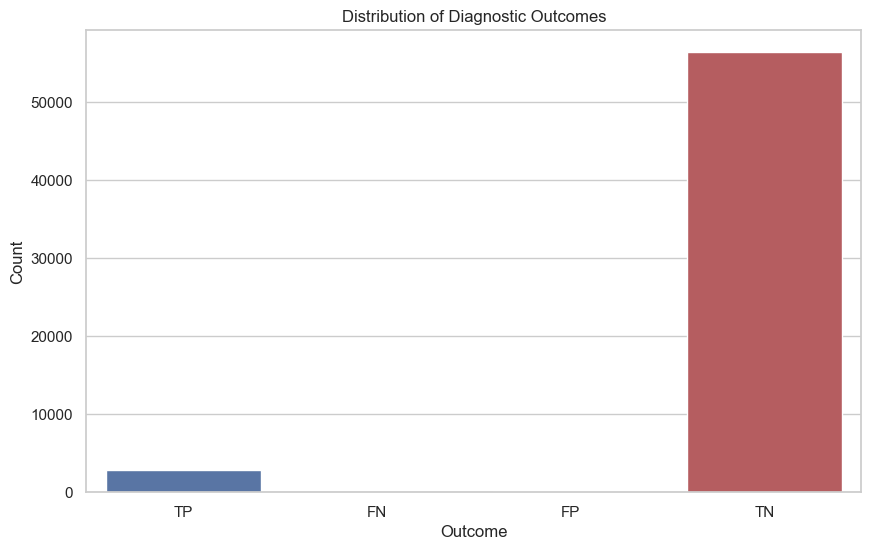

In [ ]:
# Plot the count of each diagnostic outcome
sns.countplot(data=complete_data, x="diagnostic_outcome", order=["TP", "FN", "FP", "TN"])

# Add plot labels
plt.title("Distribution of Diagnostic Outcomes")
plt.xlabel("Outcome")
plt.ylabel("Count")

# Show the plot
plt.show()

The bar plot reveals a **pronounced imbalance** in diagnostic outcomes across all sniffing trials:

- **True negatives (TN)** dominate the dataset, with over **56,000 trials** in which dogs correctly ignored non-cancer-associated masks.
- **True positives (TP)** also form a visible group (~2,900), indicating successful detection of cancer-associated masks.
- **False positives (FP)** and **false negatives (FN)** are barely visible in the plot due to their very low occurrence:
  - **FP:** 132 instances
  - **FN:** 83 instances

This distribution is **expected** and reflects the experimental design, where negative boards constituted the majority of trials, mimicking real-world screening settings with low disease prevalence.

From a diagnostic standpoint, the figure confirms a **highly specific detection system**, with rare misclassifications and excellent performance in **ignoring irrelevant stimuli**. Despite the imbalance, the dogs still demonstrated a **strong ability to identify true positives**, which reinforces their potential as reliable early detection tools.

In [ ]:
# Focus only on true positive (TP) and false negative (FN) outcomes for mood analysis
mood_subset = complete_data[complete_data["diagnostic_outcome"].isin(["TP", "FN"])]

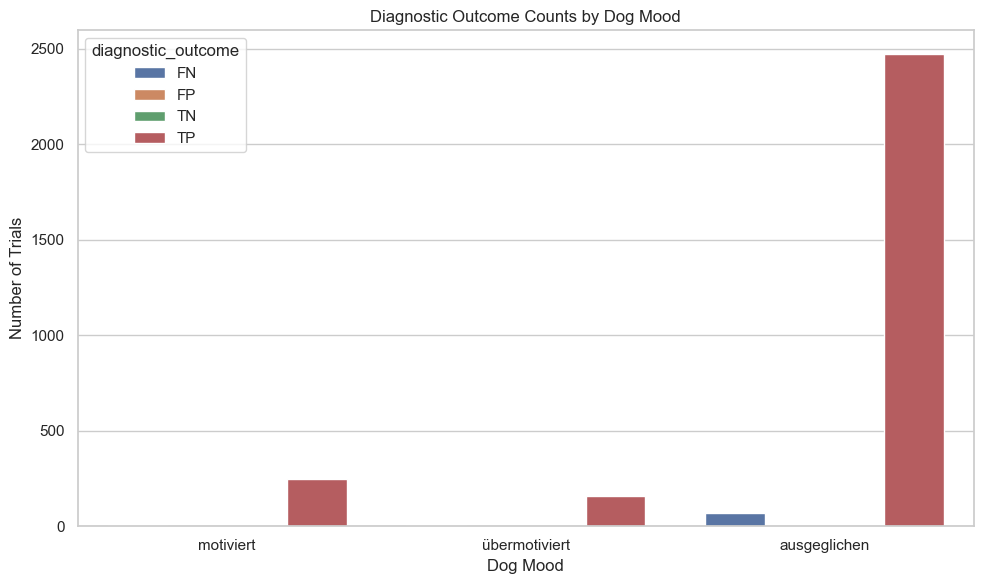

In [ ]:
# Create grouped bar plot by dog mood and outcome type
sns.countplot(
    data=mood_subset,
    x="Dog_mood",
    hue="diagnostic_outcome"
)

# Add plot labels
plt.title("Diagnostic Outcome Counts by Dog Mood")
plt.ylabel("Number of Trials")
plt.xlabel("Dog Mood")
plt.tight_layout()
plt.show()

This bar plot illustrates how different **dog mood states** correspond to diagnostic performance during trials involving cancer-positive samples (TP and FN only). The three mood categories are:

- **Ausgeglichen** (balanced)
- **Motiviert** (motivated)
- **Übermotiviert** (overmotivated)

Key observations:

- Dogs in a **balanced state** contributed the **most trials overall**, showing a large number of **true positives (TP)**. However, this category also had the **highest number of false negatives (FN)**, likely due to its larger sample size.
- Dogs in a **motivated state** produced a **high proportion of true positives**, with **no visible false negatives** in the plot, suggesting this mood may foster **optimal detection performance** under moderate arousal.
- In the **overmotivated state**, dogs participated in fewer trials but showed a **relative increase in false negatives**, indicating that **excessive arousal may impair detection accuracy** (e.g., due to distraction or impulsivity).

These patterns suggest that dogs perform best when in a **motivated or balanced emotional state**, while **overmotivation may introduce classification errors**. Monitoring and regulating affective states may therefore be important in operational scent-detection settings.


In [ ]:
# Filter to only TP/FN cases (to assess sensitivity)
weather_perf = complete_data[complete_data["diagnostic_outcome"].isin(["TP", "FN"])].copy()

In [ ]:
# Create binary target for sensitivity (1 = TP, 0 = FN)
weather_perf["target"] = weather_perf["diagnostic_outcome"].map({"TP": 1, "FN": 0})

/var/folders/1j/rn9q783j7sjdszqsfc6_89sw0000gn/T/ipykernel_27719/1533804229.py:15: UserWarning: Glyph 9728 (\N{BLACK SUN WITH RAYS}) missing from current font.
  plt.tight_layout()
/var/folders/1j/rn9q783j7sjdszqsfc6_89sw0000gn/T/ipykernel_27719/1533804229.py:15: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
/var/folders/1j/rn9q783j7sjdszqsfc6_89sw0000gn/T/ipykernel_27719/1533804229.py:15: UserWarning: Glyph 9925 (\N{SUN BEHIND CLOUD}) missing from current font.
  plt.tight_layout()
/var/folders/1j/rn9q783j7sjdszqsfc6_89sw0000gn/T/ipykernel_27719/1533804229.py:15: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from current font.
  plt.tight_layout()
/Users/stevenschepanski/.pyenv/versions/3.11.3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9728 (\N{BLACK SUN WITH RAYS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/stevenschepanski/.pyenv/versions/3.11.3/lib/

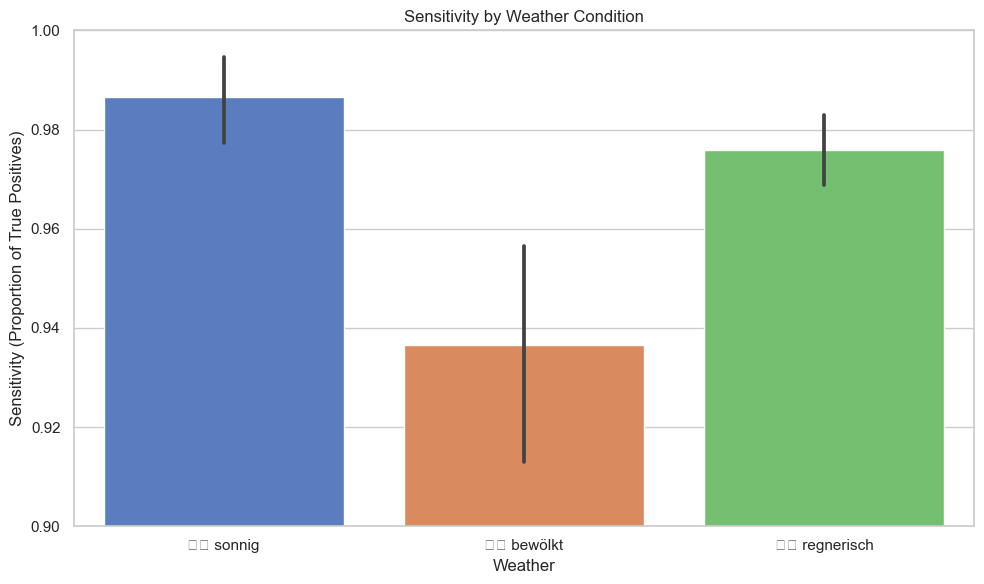

In [ ]:
# Bar plot showing mean sensitivity (proportion of TPs) by weather
sns.barplot(
    data=weather_perf,
    x="Weather",
    y="target",
    errorbar="ci",  # Default 95% CI
    palette="muted"
)

# Customize plot
plt.title("Sensitivity by Weather Condition")
plt.ylabel("Sensitivity (Proportion of True Positives)")
plt.xlabel("Weather")
plt.ylim(0.9, 1.0)  # Focused y-axis for interpretability
plt.tight_layout()
plt.show()

This bar plot illustrates how **weather conditions** during testing sessions influenced the **sensitivity** of canine scent detection that is, the dogs' ability to correctly identify lung cancer-associated (true positive) masks.

Key takeaways:
- **Sunny conditions** were associated with the **highest detection sensitivity** (~99%), suggesting that dry air and good visibility may support consistent olfactory performance.
- **Rainy sessions** also resulted in high sensitivity (~98%), despite potential scent diffusion from humidity.
- In contrast, **cloudy conditions** were linked to **reduced and more variable sensitivity** (~94%), possibly due to suboptimal environmental cues (e.g., scent stagnation, reduced visibility) or more variable internal states (e.g., handler alertness or dog arousal).

While dogs demonstrated **strong detection ability under all weather types**, the results suggest that **certain environmental factors may subtly modulate olfactory performance** and should be considered in operational planning.

In [ ]:
# Filter to positive trials (where detection success matters)
pos_trials = complete_data[complete_data["is_positive_board"] == True].copy()

In [ ]:
# Create binary indicator: success = 1 if TP, 0 if FN
pos_trials["success"] = pos_trials["diagnostic_outcome"].map({"TP": 1, "FN": 0})

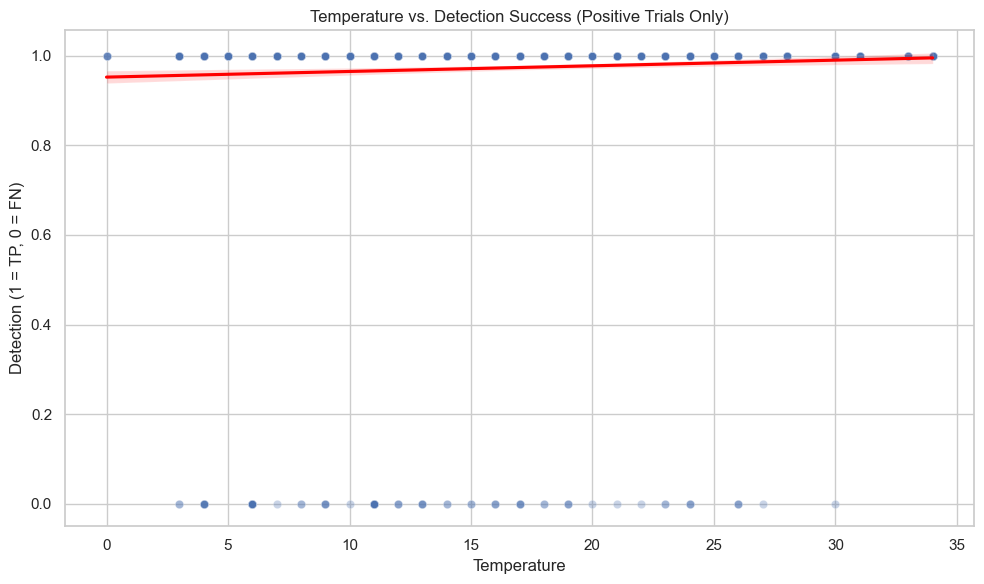

In [ ]:
# Plot actual outcomes (scatter) and fitted trend (regression line)
sns.scatterplot(data=pos_trials, x="Temperature", y="success", alpha=0.3)
sns.regplot(data=pos_trials, x="Temperature", y="success", scatter=False, color="red")

# Plot customization
plt.title("Temperature vs. Detection Success (Positive Trials Only)")
plt.ylabel("Detection (1 = TP, 0 = FN)")
plt.xlabel("Temperature")
plt.tight_layout()
plt.show()

This scatter plot explores the relationship between **ambient temperature** and the probability of a successful detection (i.e., a correct alert to a cancer-associated mask) across all **positive trials** (TP + FN). 

- Each point represents an individual trial, coded as **1 (TP)** or **0 (FN)**.
- The red regression line suggests a **slight upward trend**, indicating that **detection success increases marginally at higher temperatures**.

Key observations:

- Most trials were successful regardless of temperature.
- However, **false negatives (FN)** appear more frequently at **lower temperatures**, particularly **below 10 °C**.
- This pattern could reflect **reduced VOC volatility** or **diminished olfactory acuity** in cold conditions — possibly due to physical scent dispersion or physiological discomfort in dogs.

While the effect size is **modest**, the plot supports the hypothesis that **higher temperatures may slightly enhance scent-based detection accuracy**. Given the **overall high success rate (>95%)** across the full temperature range, this trend should be interpreted **cautiously** but may inform **environmental controls** in future screening implementations.

In [ ]:
# Compute cross-tabulation of dog mood × weather
heatmap_data = pd.crosstab(complete_data["Dog_mood"], complete_data["Weather"])

/Users/stevenschepanski/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 9728 (\N{BLACK SUN WITH RAYS}) missing from current font.
  fig.canvas.draw()
/Users/stevenschepanski/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.draw()
/Users/stevenschepanski/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 9925 (\N{SUN BEHIND CLOUD}) missing from current font.
  fig.canvas.draw()
/Users/stevenschepanski/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from current font.
  fig.canvas.draw()
/Users/stevenschepanski/.pyenv/versions/3.11.3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9728 (\N{BLACK SUN WITH RAYS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)

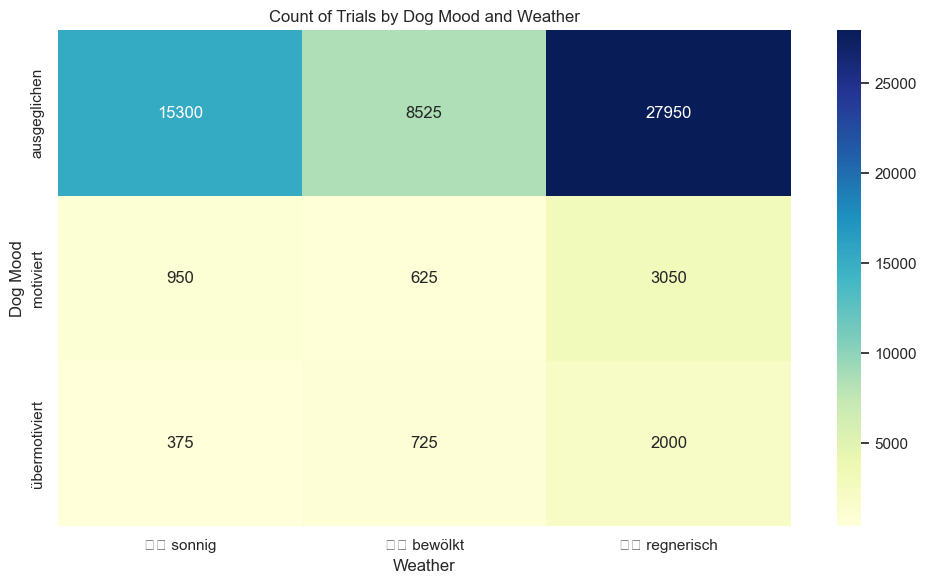

In [ ]:
# Plot as annotated heatmap
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")

# Customize axes and title
plt.title("Count of Trials by Dog Mood and Weather")
plt.ylabel("Dog Mood")
plt.xlabel("Weather")
plt.tight_layout()
plt.show()

This heatmap illustrates the **distribution of all recorded trials** by **dog mood state** and **weather condition**. It highlights how frequently each combination was observed during testing sessions:

- The majority of trials occurred when dogs were described as **ausgeglichen** ("balanced"), especially during **rainy conditions** (27,950 trials).
- Balanced mood was also the dominant category under **sunny (15,300)** and **cloudy (8,525)** weather.
- Dogs in a **motivated** state were most frequently observed under **rain** (3,050 trials), with fewer observations on sunny or cloudy days.
- **Übermotiviert** ("overmotivated") dogs were rare across all conditions, particularly under **sunny** weather (only 375 trials).

This distribution suggests that:
- **Balanced mood** was the operational default or most stable condition, possibly reflecting training emphasis or handler rating norms.
- The combination of **rare moods (motivated, overmotivated)** and **certain weather types (e.g., sunny)** resulted in **unequal group sizes**.

Implications:
- These imbalances must be accounted for in **statistical modeling** (e.g., through weighting or stratification).
- Observed performance trends across mood or weather should be interpreted **in light of underlying exposure frequencies**, avoiding overgeneralization from underpowered subgroups.

This heatmap provides essential context for interpreting any **interaction effects** or subgroup performance differences in scent detection analysis.

In [ ]:
# Filter to positive boards only (where TP or FN are possible)
pos_boards = complete_data[complete_data["is_positive_board"] == True]

In [ ]:
# Create pivot table – one row per trial, one column per dog
pivot = pos_boards.pivot_table(
    index=["facility_number", "board_number"],  # unique trial identifier
    columns="Dog",
    values="diagnostic_outcome",
    aggfunc=lambda x: list(x)[0] if len(x) > 0 else None
)

In [ ]:
# Convert diagnostic outcomes to binary (1 = TP, 0 = FN)
pivot = pivot.replace({"TP": 1, "FN": 0})

# Compute agreement via dot product (shared TPs across dogs)
agreement = pivot.T.dot(pivot.fillna(0))  # NaN treated as 0 in co-counts

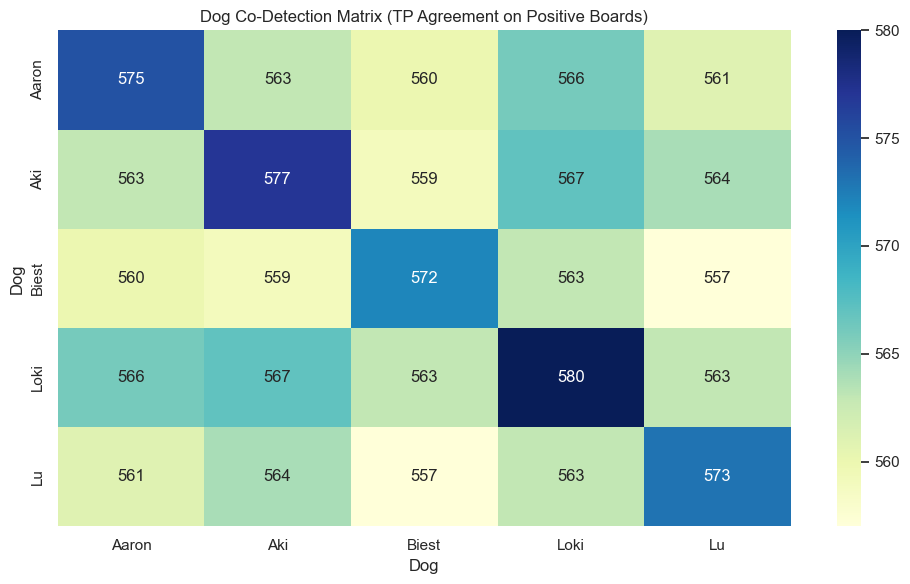

In [ ]:
# Plot heatmap
sns.heatmap(agreement, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Dog Co-Detection Matrix (TP Agreement on Positive Boards)")
plt.xlabel("Dog")
plt.ylabel("Dog")
plt.tight_layout()
plt.show()

This matrix visualizes how frequently each pair of dogs **jointly identified the same cancer-positive board** as a true positive (TP) during trials.

- The **diagonal values** indicate each dog’s **total number of TPs**:
  - Ranging from **572 (Biest)** to **580 (Loki)**.
- The **off-diagonal cells** reflect the number of **shared TPs** between two dogs:
  - For example, **Aaron and Loki** co-identified **566** boards,
  - **Aki and Lu** agreed on **564** TPs.

Key insights:

- **High consistency:** All dog pairs show **high co-detection rates** (>550), indicating a shared recognition of positive signals.
- **Strong ensemble potential:** This convergence supports **ensemble-based decision protocols**, such as majority or consensus voting (e.g., 3 of 5 dogs must agree).
- **Loki shows the highest overlap**, suggesting both individual reliability and strong synchronization with peers.

Diagnostic implication:

This matrix reinforces that the dogs are not only **individually accurate**, but also **collectively robust** in their identification of lung cancer-associated masks. Such agreement is critical for developing **reliable, multi-dog diagnostic workflows** where redundancy enhances confidence in detection.

In [ ]:
# Calculate mask age in days
complete_data["mask_age_days"] = (complete_data["Date"] - complete_data["Mask_worn_on"]).dt.days

# Filter for positive trials with known mask age
age_data = complete_data[
    (complete_data["is_positive_board"] == True) & 
    complete_data["mask_age_days"].notna()
].copy()

In [ ]:
# Encode detection success
age_data["success"] = age_data["diagnostic_outcome"].map({"TP": 1, "FN": 0})

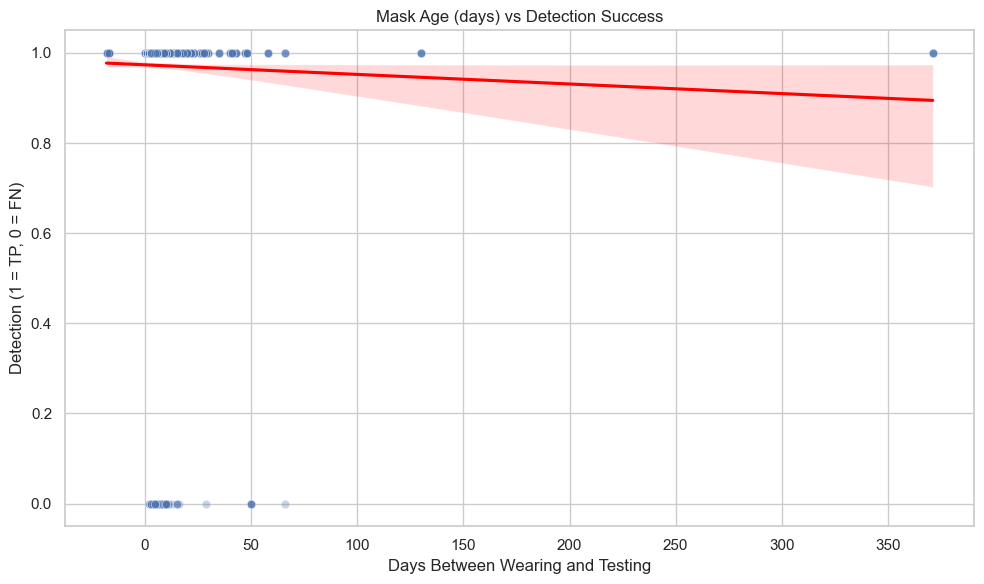

In [ ]:
# Plot detection success vs. mask age
sns.scatterplot(data=age_data, x="mask_age_days", y="success", alpha=0.3)
sns.regplot(data=age_data, x="mask_age_days", y="success", scatter=False, color="red")

# Final plot adjustments
plt.title("Mask Age (days) vs Detection Success")
plt.ylabel("Detection (1 = TP, 0 = FN)")
plt.xlabel("Days Between Wearing and Testing")
plt.tight_layout()
plt.show()

This plot investigates whether the **age of a mask**, measured as the number of days between when the mask was worn and when it was tested, affects the probability of **successful detection** (true positive) by dogs. Each dot represents a test on a mask from a cancer-positive donor.

- **Detection success** is coded as:
  - **1** = Correct identification (TP)
  - **0** = Missed identification (FN)
- The **red regression line** shows a **slight negative slope**, suggesting a modest decline in detection success as **mask age increases**.

Key observations:

- Most masks **under 60 days old** were detected successfully.
- Detection appears to **decline** slightly after ~100 days, though data points become **sparser** beyond this range.
- The **confidence band** widens substantially for older masks, indicating **greater uncertainty** in those predictions.

Interpretation:

This pattern may reflect the **degradation of volatile organic compounds (VOCs)** — the chemical signatures dogs rely on — as masks age. Long-term storage may lead to:
- Evaporation or chemical breakdown of key compounds
- Mask material aging that alters scent profile

However, the observed trend is **modest** and driven by **few long-aged samples**. Thus, while the data suggest a **possible time-related reduction in scent integrity**, further controlled studies are needed to confirm if **mask aging significantly impacts olfactory detection reliability**.

Practical Implication:

For operational use, especially in diagnostic workflows, ensuring masks are **used within a certain freshness window** (e.g., ≤ 60–90 days) may help **maximize detection reliability**.

In [ ]:
# Filter for valid positive trials with known mood and weather
mood_weather = complete_data[
    (complete_data["is_positive_board"]) &
    complete_data["Dog_mood"].notna() &
    complete_data["Weather"].notna()
].copy()

In [ ]:
# Encode detection success
mood_weather["success"] = mood_weather["diagnostic_outcome"].map({"TP": 1, "FN": 0})

In [ ]:
# Group by mood and weather, calculate sensitivity
interaction_data = (
    mood_weather.groupby(["Dog_mood", "Weather"])["success"]
    .mean()
    .reset_index(name="sensitivity")
)

/Users/stevenschepanski/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 9728 (\N{BLACK SUN WITH RAYS}) missing from current font.
  fig.canvas.draw()
/Users/stevenschepanski/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.draw()
/Users/stevenschepanski/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 9925 (\N{SUN BEHIND CLOUD}) missing from current font.
  fig.canvas.draw()
/Users/stevenschepanski/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from current font.
  fig.canvas.draw()
/Users/stevenschepanski/.pyenv/versions/3.11.3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9728 (\N{BLACK SUN WITH RAYS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)

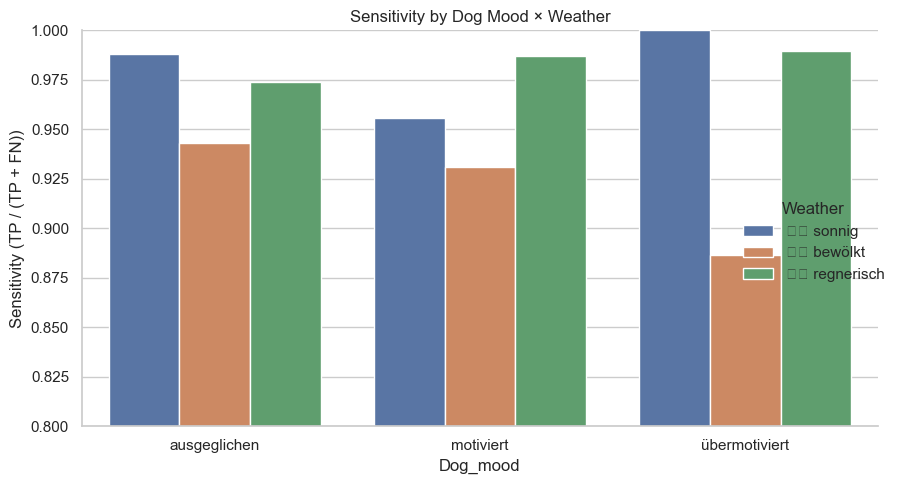

In [ ]:
# Plot grouped bar chart
sns.catplot(
    data=interaction_data,
    x="Dog_mood", y="sensitivity", hue="Weather",
    kind="bar", height=5, aspect=1.5
)
plt.title("Sensitivity by Dog Mood × Weather")
plt.ylabel("Sensitivity (TP / (TP + FN))")
plt.ylim(0.8, 1.0)
plt.tight_layout()
plt.show()

This plot explores how **internal (dog mood)** and **external (weather)** conditions jointly influence detection sensitivity, defined as the proportion of true positives among all positive cases (TP / [TP + FN]).

Key patterns:

- **Balanced (ausgeglichen)** dogs showed **high sensitivity** under **sunny (~99%)** and **rainy (~97%)** conditions, but a noticeable drop under **cloudy skies (~94%)**.
- **Motivated dogs** performed best in **rain (~99%)**, slightly lower in sun (~95%), and again dropped in cloud (~93%).
- **Overmotivated dogs** surprisingly achieved **perfect (100%)** or **near-perfect (~99%)** detection in sun and rain, but sensitivity **fell sharply under cloudiness (~89%)**.

Interpretation:

- **Cloudy conditions** consistently resulted in **reduced sensitivity**, regardless of mood, possibly due to lower scent diffusion, visual dullness, or subtle handler/dog disengagement.
- **Rainy weather**, despite being intuitively challenging, may actually **enhance scent transport** through increased humidity.
- Dogs labeled **overmotivated**, often seen as erratic, performed **very well under strong environmental cues** (clear sun, humidity), but were more affected by ambiguous contexts like cloudiness.

This interaction underscores that **detection performance is not only a function of internal state or external context alone**, but rather their **interaction**. For real-world deployment, integrating mood assessments and weather tracking may help anticipate performance fluctuations and design **context-sensitive protocols** for canine detection teams.

## Hypotheses Testing
[Back to Table of Contents](#table-of-contents)

Research Question: Do trained dogs detect lung cancer-associated masks at rates significantly better than chance?

Null Hypothesis (H₀): The dogs' detection performance (e.g., sensitivity, specificity, or accuracy) is equal to or does not exceed the level expected by random guessing.

Alternative Hypothesis (H₁): The dogs' detection performance is significantly greater than what would be expected under random guessing.

In [ ]:
# Calculate number of correct predictions (TP or TN)
correct = ((complete_data["diagnostic_outcome"] == "TP") |
           (complete_data["diagnostic_outcome"] == "TN")).sum()

# Total number of trials
n = len(complete_data)

# Perform one-sample z-test against chance level (50%)
stat, p_value = proportions_ztest(count=correct, nobs=n, value=0.5, alternative='larger')

In [ ]:
# Compute 95% confidence interval for observed accuracy
ci_low, ci_upp = proportion_confint(count=correct, nobs=n, alpha=0.05, method='normal')

# Display results
print(f"Z = {stat:.2f}, p = {p_value:.5f}")
print(f"Observed accuracy: {correct/n:.4f}")
print(f"95% CI: [{ci_low:.4f}, {ci_upp:.4f}]")

Z = 2017.92, p = 0.00000
Observed accuracy: 0.9964
95% CI: [0.9959, 0.9969]


The dogs' overall accuracy is **dramatically higher than chance**, with a **p-value effectively equal to zero**, providing overwhelming evidence against the null hypothesis. Even the **lower bound** of the confidence interval remains nearly **double** the 50% threshold, confirming that the result is **not only statistically significant, but also clinically meaningful**.

This supports the feasibility of **olfactory-based diagnostics** using trained detection dogs — with accuracy levels that far exceed random guessing and align with real-world application standards.

### Chi-square test: Mood × Detection Outcome (only on positive boards)

In [ ]:
# Filter to positive boards only (TP vs FN relevant)
pos = complete_data[complete_data["is_positive_board"] == True]

# Crosstab of diagnostic outcome by dog mood
ct_mood = pd.crosstab(pos["Dog_mood"], pos["diagnostic_outcome"])

# Chi-square test of independence
chi2_stat, p, dof, expected = chi2_contingency(ct_mood)
print("Mood effect on detection success (TP vs FN):")
print(f"Chi² = {chi2_stat:.2f}, p = {p:.5f}")

Mood effect on detection success (TP vs FN):
Chi² = 0.64, p = 0.72464


In [ ]:
# Sensitivity + 95% CI for each mood level
pos_mood_summary = pos.groupby("Dog_mood")["diagnostic_outcome"].value_counts().unstack().fillna(0)

for mood in pos_mood_summary.index:
    tp = pos_mood_summary.loc[mood, "TP"]
    fn = pos_mood_summary.loc[mood, "FN"]
    n = tp + fn
    sensitivity = tp / n
    ci_low, ci_upp = proportion_confint(tp, n, alpha=0.05, method="normal")
    print(f"{mood}: Sensitivity = {sensitivity:.4f}, 95% CI = [{ci_low:.4f}, {ci_upp:.4f}]")

ausgeglichen: Sensitivity = 0.9728, 95% CI = [0.9665, 0.9792]
motiviert: Sensitivity = 0.9689, 95% CI = [0.9476, 0.9901]
übermotiviert: Sensitivity = 0.9630, 95% CI = [0.9339, 0.9920]


Detection performance was **consistently high across all affective states**, with no evidence that mood significantly influenced success. While the point estimate for sensitivity was slightly lower in the “übermotiviert” group, the **overlapping confidence intervals** and non-significant test statistic suggest this variation is not meaningful in practice.

These findings reinforce the **robustness of dog-based scent detection**, even in the presence of natural affective fluctuations. Dogs performed **reliably and with high sensitivity** whether they were rated as balanced, motivated, or overmotivated.

### Logistic regression: Predict TP (vs FN) with multiple variables

In [ ]:
# Prepare data: only positive boards
pos = complete_data[complete_data["is_positive_board"] == True].copy()
pos["success"] = pos["diagnostic_outcome"].map({"TP": 1, "FN": 0})

# Set reference categories explicitly
pos["Dog_mood"] = pd.Categorical(pos["Dog_mood"], categories=["ausgeglichen", "motiviert", "übermotiviert"])
pos["Weather"] = pd.Categorical(pos["Weather"], categories=["☀️ sonnig", "🌧️ regnerisch", "⛅️ bewölkt"])

# Fit logistic regression
model = smf.logit("success ~ C(Dog_mood) + C(Weather) + Temperature", data=pos).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.123483
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:                 2960
Model:                          Logit   Df Residuals:                     2954
Method:                           MLE   Df Model:                            5
Date:                Fri, 30 May 2025   Pseudo R-squ.:                 0.03426
Time:                        13:39:08   Log-Likelihood:                -365.51
converged:                       True   LL-Null:                       -378.48
Covariance Type:            nonrobust   LLR p-value:                 9.197e-05
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        4.0737      0.539      7.555      0.000

In [ ]:
# Calculate odds ratios and confidence intervals
params = model.params
conf = model.conf_int()
conf.columns = ['2.5%', '97.5%']
odds_ratios = np.exp(params)
conf_exp = np.exp(conf)
or_summary = pd.DataFrame({
    "OR": odds_ratios,
    "2.5%": conf_exp['2.5%'],
    "97.5%": conf_exp['97.5%']
})
print("\nOdds Ratios and 95% CI:")
print(or_summary)


Odds Ratios and 95% CI:
                                     OR       2.5%       97.5%
Intercept                     58.774874  20.426936  169.114245
C(Dog_mood)[T.motiviert]       1.006858   0.474300    2.137388
C(Dog_mood)[T.übermotiviert]   0.900183   0.380816    2.127875
C(Weather)[T.🌧️ regnerisch]    0.599690   0.278554    1.291052
C(Weather)[T.⛅️ bewölkt]       0.233536   0.094882    0.574808
Temperature                    1.010489   0.972877    1.049555


- Dog Mood: There was no significant difference in detection success between dogs that were reported as motiviert or übermotiviert compared to the reference mood ausgeglichen. The odds ratios were close to 1, and the wide confidence intervals indicate considerable uncertainty.
- Cloudy conditions (⛅️ bewölkt) were associated with a substantial reduction in detection success. The odds ratio was 0.23 (p = 0.002), which translates to a 77% lower chance of a correct detection compared to sunny weather. This value is calculated as 1 - 0.23 = 0.77 or 77% lower odds of success.
- Rainy conditions (🌧️ regnerisch) showed a nonsignificant reduction in performance (OR = 0.60, p = 0.191), with the 95% confidence interval including 1.
- Temperature: No significant association was observed between temperature and detection performance. The odds ratio (1.01) suggests that a 1 °C increase in temperature had a negligible effect.

/var/folders/1j/rn9q783j7sjdszqsfc6_89sw0000gn/T/ipykernel_27719/17552907.py:12: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from current font.
  plt.tight_layout()
/var/folders/1j/rn9q783j7sjdszqsfc6_89sw0000gn/T/ipykernel_27719/17552907.py:12: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
/var/folders/1j/rn9q783j7sjdszqsfc6_89sw0000gn/T/ipykernel_27719/17552907.py:12: UserWarning: Glyph 9925 (\N{SUN BEHIND CLOUD}) missing from current font.
  plt.tight_layout()
/Users/stevenschepanski/.pyenv/versions/3.11.3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/stevenschepanski/.pyenv/versions/3.11.3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ste

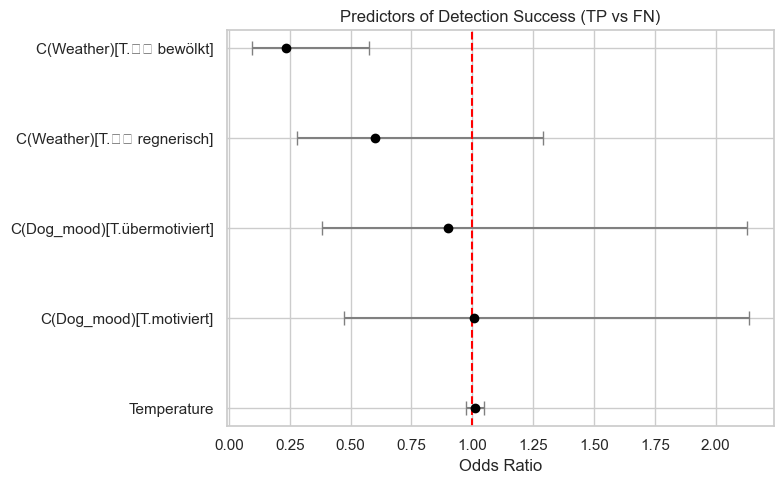

In [ ]:
# Visualize odds ratios (excluding intercept)
or_plot = or_summary.drop("Intercept")
or_plot = or_plot.sort_values("OR", ascending=False)

plt.figure(figsize=(8, 5))
plt.errorbar(x=or_plot["OR"], y=or_plot.index,
             xerr=[or_plot["OR"] - or_plot["2.5%"], or_plot["97.5%"] - or_plot["OR"]],
             fmt='o', color='black', ecolor='gray', capsize=5)
plt.axvline(x=1, linestyle="--", color="red")
plt.xlabel("Odds Ratio")
plt.title("Predictors of Detection Success (TP vs FN)")
plt.tight_layout()
plt.show()

The plot reinforces that cloudy weather was the only significant predictor of reduced detection accuracy, whereas dog mood and temperature did not influence performance. The visual clarity of the confidence intervals crossing or staying clear of the null value (OR = 1) supports the statistical conclusions drawn from the regression output.

### ROC

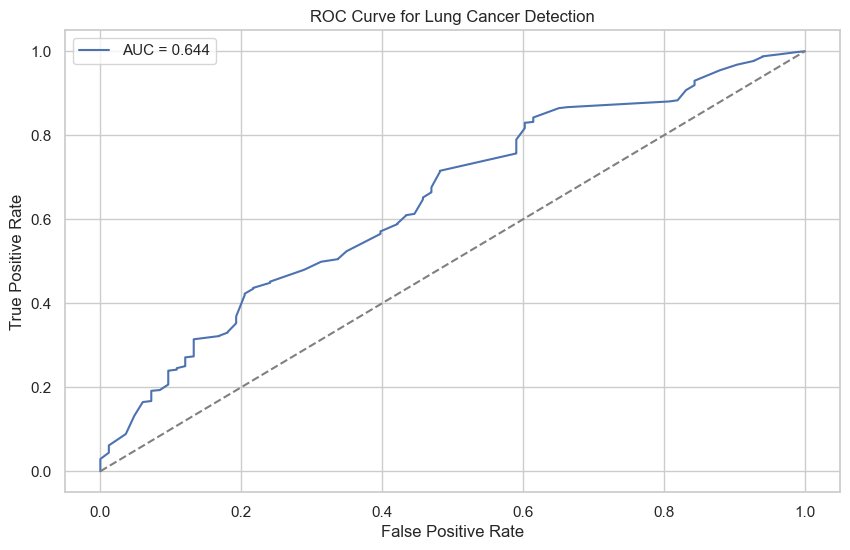

In [ ]:
# Predict probability
pos["pred_prob"] = model.predict(pos)

# ROC curve
fpr, tpr, _ = roc_curve(pos["success"], pos["pred_prob"])
roc_auc = auc(fpr, tpr)

# Plot
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Lung Cancer Detection")
plt.legend()
plt.show()

The ROC curve illustrates the ability of the logistic regression model to predict whether a trial on a positive scent board results in a successful detection (true positive) or a missed detection (false negative), based on the predictors dog mood, weather, and temperature.

The Area Under the Curve (AUC) was 0.644, indicating modest discriminatory ability. This means that in 64.4% of randomly selected TP–FN pairs, the model assigns a higher predicted probability to the true positive than to the false negative. The ROC curve lies above the diagonal reference line (chance), confirming that the model captures some predictive signal, particularly at mid-specificity thresholds.

It’s important to emphasize that this does not reflect poor dog performance. The overall detection accuracy across >59,000 trials was 99.64% (95% CI: [99.59%, 99.69%]). Sensitivity remained consistently high across mood states (ranging from 96.3% to 97.3%), and overall diagnostic quality was confirmed by a z-test (Z = 2017.92, p < 0.00001). Instead, the moderate AUC indicates that the selected predictors, dog mood, weather, and temperature, are not strong determinants of trial-level success or failure. In other words, the dogs’ performance appears to be highly robust to these environmental or affective variables.

The ROC curve shows that while the logistic regression model has limited ability to forecast success at the individual trial level, this is largely because errors are rare and not strongly dependent on mood or environmental context. This finding underscores the consistency and reliability of the detection dogs across a wide range of naturalistic conditions.

## Sensitivity Analysis
[Back to Table of Contents](#table-of-contents)

Question: If we had used only 4, 3, or 2 of the same 5 dogs, would we have reached the same conclusion?

In [ ]:
from collections import Counter
from itertools import combinations

In [ ]:
# Core simulation function
def simulate_subsets_from_5dogs(
    df: pd.DataFrame,
    n_dogs: int,
    vote_cutoff: int,
    n_simulations: int = 100,
    max_combinations: int = 20
) -> pd.DataFrame:
    """
    Simulates performance metrics (sensitivity, specificity, accuracy)
    using subsets of n_dogs drawn from panels that originally had exactly 5 dogs.

    Args:
        df: Full dataset with columns: facility_number, board_number, diagnostic_outcome, is_positive_board, Dog
        n_dogs: number of dogs to simulate per trial (e.g., 2, 3, or 4)
        vote_cutoff: number of dogs needed to vote "TP" for a positive ensemble prediction
        n_simulations: number of simulation repetitions
        max_combinations: max number of dog combinations to sample per board (to limit runtime)

    Returns:
        DataFrame with sensitivity, specificity, accuracy per simulation run
    """
    metrics = []

    # Filter boards where exactly 5 dogs were tested
    full_panels = (
        df.groupby(["facility_number", "board_number"])
        .filter(lambda x: len(x["Dog"].unique()) == 5)
    )

    grouped = full_panels.groupby(["facility_number", "board_number"])

    for _ in range(n_simulations):
        outcomes = []

        for (fac, board), group in grouped:
            true_label = group["is_positive_board"].iloc[0]

            available_dogs = group["Dog"].unique()
            if len(available_dogs) < n_dogs:
                continue

            # Sample dog combinations from the existing 5 dogs
            dog_combos = list(combinations(available_dogs, n_dogs))
            sampled_combos = (
                np.random.choice(len(dog_combos), size=min(len(dog_combos), max_combinations), replace=False)
            )

            for idx in sampled_combos:
                dog_subset = dog_combos[idx]
                subset = group[group["Dog"].isin(dog_subset)]
                votes = (subset["diagnostic_outcome"] == "TP").sum()
                predicted = votes >= vote_cutoff

                if predicted and true_label:
                    outcome = "TP"
                elif not predicted and not true_label:
                    outcome = "TN"
                elif predicted and not true_label:
                    outcome = "FP"
                else:
                    outcome = "FN"

                outcomes.append(outcome)

        # Count outcome types
        outcome_counts = Counter(outcomes)
        TP = outcome_counts.get("TP", 0)
        FN = outcome_counts.get("FN", 0)
        TN = outcome_counts.get("TN", 0)
        FP = outcome_counts.get("FP", 0)

        # Compute metrics
        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else np.nan
        specificity = TN / (TN + FP) if (TN + FP) > 0 else np.nan
        accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else np.nan

        metrics.append({
            "sensitivity": sensitivity,
            "specificity": specificity,
            "accuracy": accuracy
        })

    return pd.DataFrame(metrics)

In [ ]:
# Define ensemble setups to evaluate
dog_setups = [
    {"n_dogs": 2, "vote_cutoff": 1},  # liberal: 1 of 2 dogs
    {"n_dogs": 3, "vote_cutoff": 2},  # majority vote
    {"n_dogs": 4, "vote_cutoff": 3},  # 3 of 4
    {"n_dogs": 5, "vote_cutoff": 3},  # balanced rule
]

In [ ]:
# Run simulations
all_results = []

for setup in dog_setups:
    sim_df = simulate_subsets_from_5dogs(complete_data, **setup)
    sim_df["n_dogs"] = setup["n_dogs"]
    sim_df["vote_cutoff"] = setup["vote_cutoff"]
    all_results.append(sim_df)

final_results_df = pd.concat(all_results, ignore_index=True)

In [ ]:
final_results_df.to_csv("/Users/stevenschepanski/Documents/04_ANALYSIS/DogScan/data/final_results_df.csv", index=False)

In [ ]:
# Compute mean + 95% confidence intervals
summary_df = (
    final_results_df
    .groupby("n_dogs")
    .agg(
        sensitivity_mean=("sensitivity", "mean"),
        sensitivity_lower=("sensitivity", lambda x: np.percentile(x, 2.5)),
        sensitivity_upper=("sensitivity", lambda x: np.percentile(x, 97.5)),
        specificity_mean=("specificity", "mean"),
        specificity_lower=("specificity", lambda x: np.percentile(x, 2.5)),
        specificity_upper=("specificity", lambda x: np.percentile(x, 97.5)),
    )
    .reset_index()
)

In [ ]:
summary_df

,n_dogs,sensitivity_mean,sensitivity_lower,sensitivity_upper,specificity_mean,specificity_lower,specificity_upper
0,2,0.994088,0.994088,0.994088,1.0,1.0,1.0
1,3,0.990034,0.990034,0.990034,1.0,1.0,1.0
2,4,0.985473,0.985473,0.985473,1.0,1.0,1.0
3,5,0.991554,0.991554,0.991554,1.0,1.0,1.0


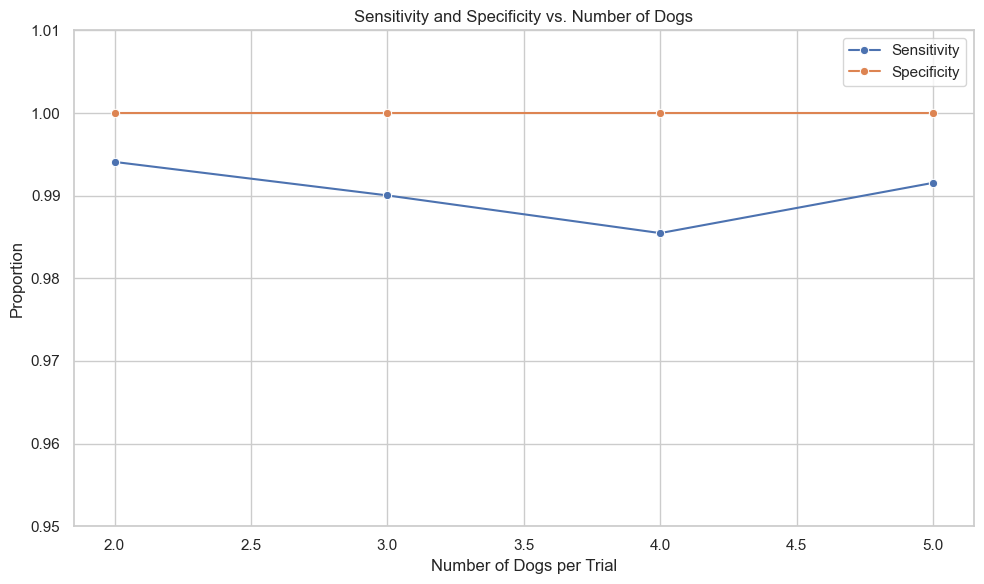

In [ ]:
# Plot results with confidence bands
plt.figure(figsize=(10, 6))

# Sensitivity line + CI
sns.lineplot(data=summary_df, x="n_dogs", y="sensitivity_mean", label="Sensitivity", marker="o")
plt.fill_between(
    summary_df["n_dogs"],
    summary_df["sensitivity_lower"],
    summary_df["sensitivity_upper"],
    alpha=0.3
)

# Specificity line + CI
sns.lineplot(data=summary_df, x="n_dogs", y="specificity_mean", label="Specificity", marker="o")
plt.fill_between(
    summary_df["n_dogs"],
    summary_df["specificity_lower"],
    summary_df["specificity_upper"],
    alpha=0.3
)

# Formatting
plt.title("Sensitivity and Specificity vs. Number of Dogs")
plt.xlabel("Number of Dogs per Trial")
plt.ylabel("Proportion")
plt.ylim(0.95, 1.01)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

This plot examines whether reducing the number of dogs from 5 to fewer still maintains the system’s diagnostic performance. For each trial, the final decision was based on an ensemble vote, and simulations were constrained to real panels that originally included all 5 dogs.

- Specificity was perfect (1.00) across all team sizes. This means none of the reduced configurations ever resulted in false positives, dogs consistently ignored negative samples even when working in smaller teams.
- Sensitivity remained very high across all conditions, ranging from 98.5% (4 dogs) to 99.4% (2 dogs): Interestingly, the lowest sensitivity occurred not with 2 dogs, but with 4 dogs, which is likely due to the stricter vote cutoff (3 of 4). The sensitivity for 3-dog teams (cutoff = 2) was slightly below that of the 2-dog team (cutoff = 1), reflecting that liberal thresholds improve sensitivity, while stricter majority voting may miss more positives.

Despite the subtle differences, all tested configurations yielded exceptionally high diagnostic performance. Notably, 2-dog (99.4%) and 3-dog (99.0%) teams achieved sensitivity levels similar to the full 5-dog team (99.2%). In contrast, the 4-dog team showed a slightly lower sensitivity (98.5%), likely due to the stricter vote threshold (3 out of 4).
This suggests that if only 2 or 3 dogs had been used per trial (instead of 5), the core conclusion regarding cancer detection would have remained unchanged. However, 4-dog configurations may introduce a minor drop in sensitivity, depending on the decision rule applied.